<a href="https://colab.research.google.com/github/QuantumPythonist/Image-Compression-KMeans/blob/main/KMeans-Image-Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please enter the path to the image file: Image.png
Please enter the maximum number of clusters to test: 4


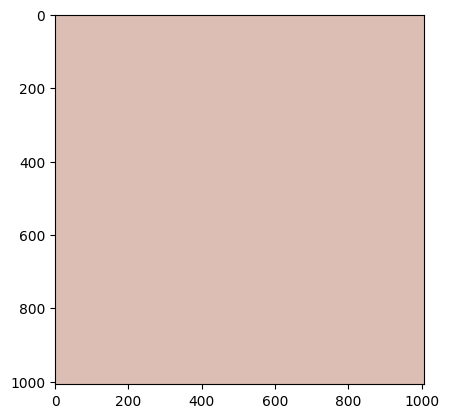

Compressed image has 1 unique colors. Compression ratio: 100.00%


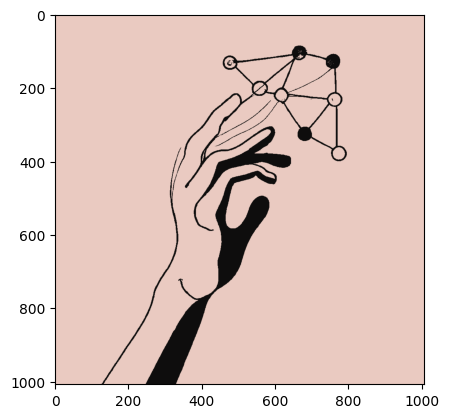

Compressed image has 2 unique colors. Compression ratio: 99.99%


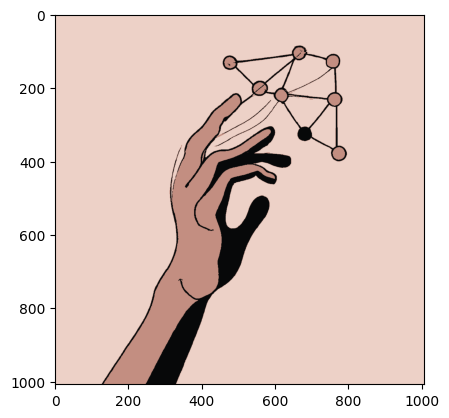

Compressed image has 3 unique colors. Compression ratio: 99.99%


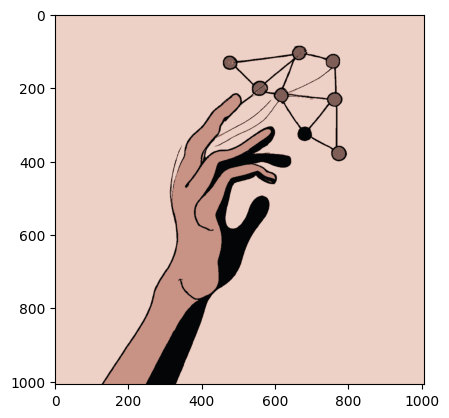

Compressed image has 4 unique colors. Compression ratio: 99.98%


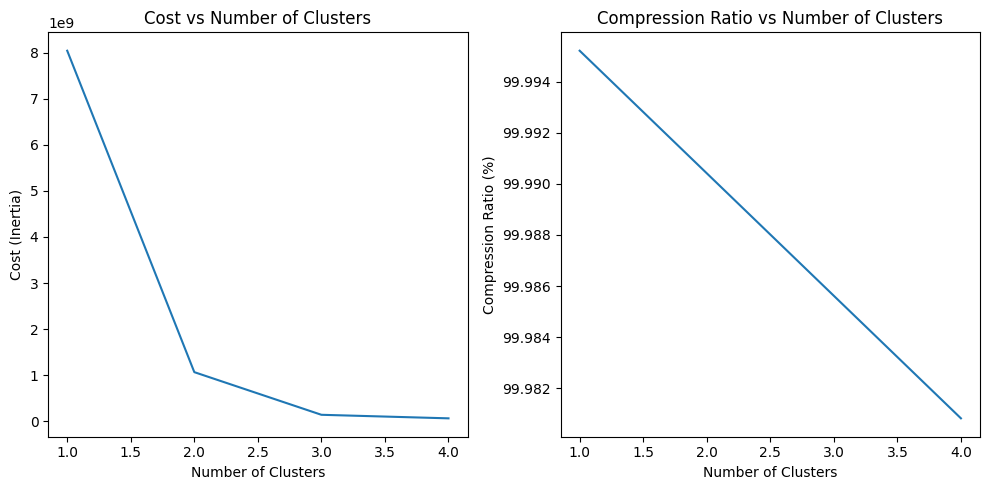

In [9]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def compress_image(image_path, n_clusters):
    """Compresses an image using KMeans clustering.

    Args:
        image_path (str): Path to the image file.
        n_clusters (int): Number of clusters for KMeans.

    Returns:
        tuple: Compressed image, inertia, number of unique colors, compression ratio.
    """
    # Load and convert image to RGB
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Get unique colors in original image
    original_unique_colors = np.unique(img.reshape(-1, img.shape[2]), axis=0)
    original_num_unique_colors = len(original_unique_colors)

    # Reshape image to be a list of RGB pixels
    reshaped_image = img.reshape(-1, 3)

    # Apply KMeans
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=20)
    kmeans.fit(reshaped_image)

    # Map colors to clusters
    new_colors = kmeans.cluster_centers_[kmeans.labels_]

    # Reshape mapped colors to original image dimensions
    compressed_image = new_colors.reshape(img.shape).astype(int)

    # Get unique colors in compressed image
    compressed_unique_colors = np.unique(compressed_image.reshape(-1, compressed_image.shape[2]), axis=0)
    compressed_num_unique_colors = len(compressed_unique_colors)

    # Compute the color compression ratio
    compression_ratio = 100 * (original_num_unique_colors - compressed_num_unique_colors) / original_num_unique_colors

    # Display the compressed image
    plt.imshow(compressed_image)
    plt.show()

    print(f"Compressed image has {compressed_num_unique_colors} unique colors. Compression ratio: {compression_ratio:.2f}%")

    return compressed_image, kmeans.inertia_, compressed_num_unique_colors, compression_ratio


def find_optimal_clusters(image_path, max_clusters):
    """Finds the optimal number of clusters using the Elbow Method.

    Args:
        image_path (str): Path to the image file.
        max_clusters (int): Maximum number of clusters to test.

    Returns:
        None
    """
    costs = []
    compression_ratios = []
    for i in range(1, max_clusters + 1):
        _, cost, _, compression_ratio = compress_image(image_path, i)
        costs.append(cost)
        compression_ratios.append(compression_ratio)

    # Plot the cost and compression ratio against the number of clusters
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.plot(range(1, max_clusters + 1), costs)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cost (Inertia)')
    plt.title('Cost vs Number of Clusters')

    plt.subplot(1,2,2)
    plt.plot(range(1, max_clusters + 1), compression_ratios)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Compression Ratio (%)')
    plt.title('Compression Ratio vs Number of Clusters')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    image_path = input("Please enter the path to the image file: ")
    max_clusters = int(input("Please enter the maximum number of clusters to test: "))
    find_optimal_clusters(image_path, max_clusters)